<a href="https://colab.research.google.com/github/towelenee/purchase_analisis/blob/main/histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://clearspending.ru/download/opendata/contracts_223fz_202308-20230830.jsonl.zip
!unzip *.zip

--2023-08-30 17:14:47--  https://clearspending.ru/download/opendata/contracts_223fz_202308-20230830.jsonl.zip
Resolving clearspending.ru (clearspending.ru)... 172.67.161.228, 104.21.33.113, 2606:4700:3031::ac43:a1e4, ...
Connecting to clearspending.ru (clearspending.ru)|172.67.161.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87809078 (84M) [application/zip]
Saving to: ‘contracts_223fz_202308-20230830.jsonl.zip.1’

contracts_223fz_202 100%[===================>]  83.74M  22.2MB/s    in 4.0s    

2023-08-30 17:14:52 (20.9 MB/s) - ‘contracts_223fz_202308-20230830.jsonl.zip.1’ saved [87809078/87809078]

Archive:  contracts_223fz_202308-20230830.jsonl.zip
replace contracts_223fz_202308-20230830.jsonl? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import json

with open('contracts_223fz_202308-20230830.jsonl') as file:
    for line in file:
        d = json.loads(line)
        print(d.keys())
        print(d['currency'])
        print(d['price'])
        print(d['products'][0].name)
        break

dict_keys(['attachments', 'createDateTime', 'currency', 'customer', 'execution', 'fileVersion', 'fz', 'id', 'loadId', 'misuses', 'name', 'number', 'placer', 'price', 'products', 'protocolDate', 'publishDate', 'purchaseInfo', 'regNum', 'regionCode', 'scan', 'schemaVersion', 'signDate', 'status', 'versionNumber'])
{'code': 'RUB', 'name': 'Российский рубль', 'digitalCode': '643'}
409803.18
{'name': 'Линии (кабели) электропередачи высокого напряжения', 'OKEI': {'code': '876', 'name': 'Условная единица'}, 'price': 409803.18, 'OKPD2': {'code': '42.22.11.110', 'name': 'Линии (кабели) электропередачи высокого напряжения'}, 'quantity': '1', 'ordinalNumber': '1'}


In [42]:
products = {}
okei = set()
currencies = set()
with open('contracts_223fz_202308-20230830.jsonl') as file:
    for line in file:
        d = json.loads(line)
        #print(d.keys())
        currencies.add(d['currency']['code'])
        #print(d['price'])
        for p in d['products']:
            if p.get('OKEI') and p['OKEI'].get('name') == 'Килограмм' and p.get('OKPD2'):
              n = p['OKPD2']['name']
              if products.get(n):
                products[n].append(d['price'] / d.get('quantity', 1))
              else:
                products[n] = [d['price'] / d.get('quantity', 1)]
print(currencies)
print(len(products))
k = 0



{'KZT', 'BDT', 'NOK', 'CHF', 'RSD', 'TRY', 'VND', 'EUR', 'TJS', 'AUD', 'AED', 'EGP', 'AMD', 'RUB', 'CNY', 'USD', 'GBP', 'INR'}
1651


Сахар белый свекловичный в твердом состоянии без вкусоароматических или красящих добавок [63490.0, 485937.0, 396422.0, 379826.0, 769535.0, 371482.66, 612000.0, 335424.0, 118500.0, 173200.0, 814104.57, 265431.0, 10944.0, 99640.0, 1387714.76, 17000.0, 229008.78, 17664350.0, 695300.0, 969120.0, 184269.6, 44550.0, 351325.0, 142063.5, 507585.02, 18791166.0, 969120.0, 969120.0, 1494800.0, 3230000.0, 549011.1, 297711.0, 2093066.78, 1775674.6, 1775674.6, 207551.2, 1209706.67, 109213.5, 64078.0, 171767.01, 264000.0, 372993.0, 1817652.0, 248928.9, 536750.0, 183500.0, 234400.0, 1376184.76, 2168263.7, 71726.5, 213805.0, 408670.0, 597609.5, 381958.22, 453815.9, 453815.9, 453815.9, 27999533.4, 1994320.0, 471690.0, 342840.0, 151125.0, 96381.4, 93552.9, 159254.5, 5168779.81, 680000.0, 10399.99, 11150.0, 2481714.0, 5250000.0, 63175.0, 63175.0, 1197695.43, 402467.02, 206700.0, 999493.02, 5970330.0, 136800.0, 1124182.68, 2250342.0, 345089.0, 77265.0, 103295.0, 357645.72, 210232.32, 594000.0, 256245.0, 36

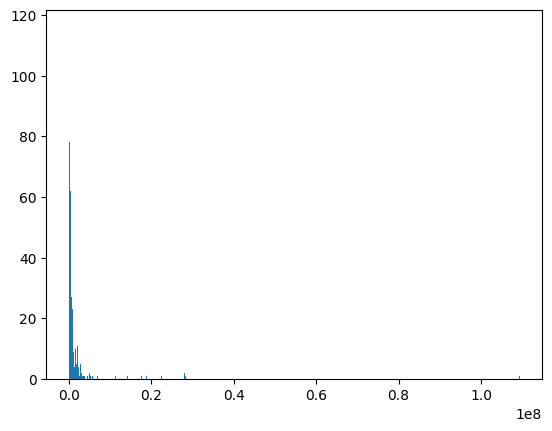

Говядина парная, остывшая или охлажденная [872800.0, 3187000.0, 389550.0, 169460.0, 105000.0, 920170.0, 931500.0, 987800.0, 198000.0, 527500.0, 166950.0, 166950.0, 21631050.0, 868300.0, 150000.0, 87000.0, 105495.0, 114510.0, 195070.0, 134712.0, 580000.0, 554040.0, 99840.0, 383493.0, 454300.0, 1054950.0, 226200.0, 320486.0, 2250342.0, 273810.0, 44500.0, 332600.0, 527400.0, 1467841.0, 1467841.0, 463670.5, 216290.0, 134244.0, 141446.0, 1047750.0, 97500.0, 190000.0, 3107253.6, 3107253.6, 74986500.0, 74986500.0, 1036782.72, 1451200.0, 1451200.0, 1451200.0, 100150.0, 404230.0, 628600.0, 319912.0, 576000.0, 245258.27, 1780000.0, 320000.0, 187992.0, 319200.0, 210662.0, 210662.0, 133400.0, 108877.0, 197152.0, 598000.0, 184000.0, 1404000.0, 1996100.0, 167642.0, 490000.0, 242812.5, 585800.0, 588700.0, 97500.0, 2073987.5, 2545000.0, 259200.0, 259200.0, 37050.0, 1661400.0, 200272.0, 47476.75, 102000.0, 752000.0, 218700.0, 2174925.0, 3053845.5, 4127232.96, 4127232.96, 153000.0, 153000.0, 41800.0, 93

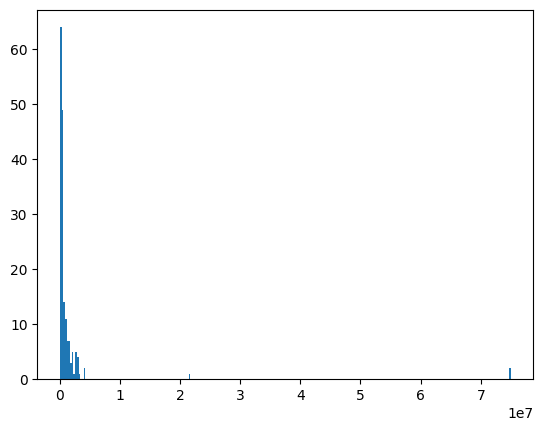

Мясо кур, в том числе цыплят (включая цыплят-бройлеров) охлажденное [872800.0, 3187000.0, 410400.0, 1999563.2, 1999563.2, 2030705.55, 2030705.55, 2030705.55, 186100.0, 460540.0, 460540.0, 460540.0, 460540.0, 460540.0, 460540.0, 460540.0, 460540.0, 460540.0, 429275.0, 429275.0, 429275.0, 150620.0, 150620.0, 612900.0, 18791166.0, 18791166.0, 18791166.0, 18791166.0, 987800.0, 987800.0, 11417117.0, 11417117.0, 11417117.0, 109490.0, 598700.0, 598700.0, 474718.0, 474718.0, 931850.0, 71920.0, 527500.0, 527500.0, 2093066.78, 676800.0, 361500.0, 445003.6, 45736.0, 45736.0, 102850.0, 51380.0, 2135250.0, 2135250.0, 383493.0, 270310.0, 21174755.55, 21174755.55, 21174755.55, 21174755.55, 21174755.55, 21174755.55, 21174755.55, 21174755.55, 272507.84, 272507.84, 272507.84, 1054950.0, 72750.0, 72750.0, 594000.0, 4282144.9, 4282144.9, 4282144.9, 4282144.9, 4282144.9, 4282144.9, 4282144.9, 4282144.9, 4282144.9, 136224.19, 103400.0, 226200.0, 1197695.43, 1197695.43, 274000.0, 273320.0, 273320.0, 126420.0

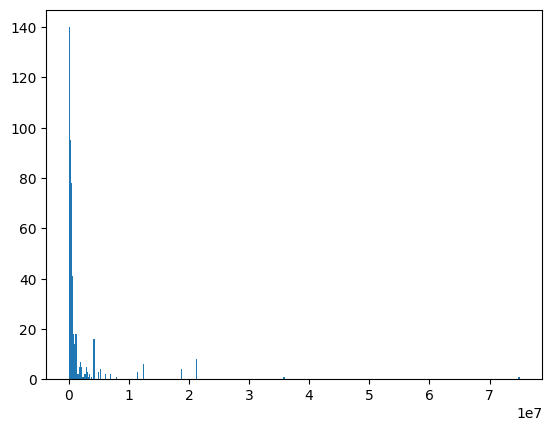

Филе морской рыбы мороженое [872800.0, 1268200.0, 1268200.0, 1999563.2, 1999563.2, 1999563.2, 2030705.55, 964750.0, 987504.5, 526900.0, 257130.0, 460000.0, 346980.0, 346980.0, 26640000.0, 26640000.0, 26640000.0, 902650.0, 159975.0, 1586803.34, 1586803.34, 1586803.34, 1586803.34, 1586803.34, 275500.0, 12250.0, 2135250.0, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 7690027.75, 317860.0, 236955.0, 423050.0, 637250.0, 7800000.0, 596500.0, 1119787.97, 5100000.0, 1494320.6, 1494320.6, 1494320.6, 4155264.79, 4155264.79, 66637.8, 380152.0, 380152.0, 380152.0, 380152.0, 380152.0, 380152.0, 89960.0, 331450.0, 214110.0, 122000.0, 168052.2, 296624.0, 58408.5, 627867.18, 1036782.72, 1658250.0, 35271600.0, 35271600.0, 35271600.0, 168368.22, 4544909.15, 4544909.15, 4544909.15, 4544909.15, 4544909.15, 4544909.15, 8875000

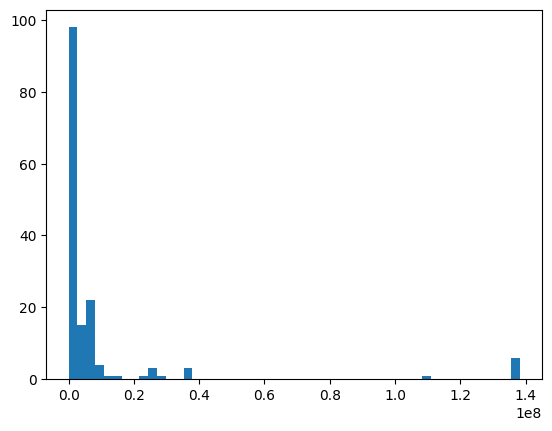

Баклажаны [329650.0, 397000.0, 1544648.63, 1544648.63, 477290.0, 119050.0, 975850.0, 18594150.0, 6846013.13, 6846013.13, 628050.0, 678364.78, 249600.0, 5553598.93, 5553598.93, 4003090.75, 581870.5, 6409867.72, 1119787.97, 12298.0, 345610.0, 2845334.7, 775118.8, 16667.0, 726155.38, 241950.0, 198686.0, 442261.13, 1036782.72, 301850.0, 2545249.0, 1101036.32, 1101036.32, 75752.0, 51103350.97, 35386.08, 236708850.0, 3497003.0, 3497003.0, 6230220.17, 6230220.17, 7196069.7, 7196069.7, 7196069.7, 25928960.0, 7000392.2, 7000392.2, 62000.0, 463430.0, 417200.0, 4022000.0, 4083000.0, 5426406.6, 3601772.25, 3601772.25, 59350.0, 242330.0, 311894.0, 3061236.48, 257840.0, 368400.0, 443246.0, 116204.0, 201798.0, 474000.0, 133765.0, 278330.0, 1385907.2, 171685.0, 201041.65, 29882194.89, 29882194.89, 29882194.89, 232844.5, 550800.0, 4826121.51, 106638.0, 329362.0, 206154.2, 172674.5, 971930.0, 1776583.0, 87246.0, 41590.0, 114199.15, 114199.15, 398470.0, 3253616.21, 3253616.21, 3253616.21, 3253616.21, 392

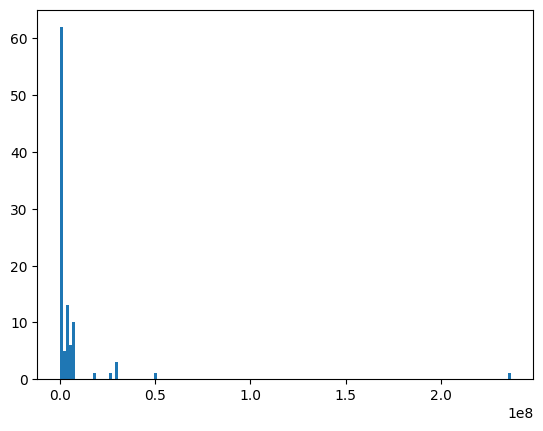

Кабачки [329650.0, 386130.0, 397000.0, 477290.0, 119050.0, 364400.0, 593650.0, 975850.0, 18594150.0, 6846013.13, 6846013.13, 394250.0, 628050.0, 678364.78, 249600.0, 49152.0, 513090.0, 5553598.93, 5553598.93, 5553598.93, 4003090.75, 4003090.75, 581870.5, 1124182.68, 6409867.72, 1119787.97, 785731.16, 12298.0, 345610.0, 2845334.7, 50700.0, 775118.8, 16667.0, 726155.38, 241950.0, 198686.0, 442261.13, 224150.0, 1036782.72, 199610.8, 301850.0, 2545249.0, 1101036.32, 1101036.32, 75752.0, 51103350.97, 51103350.97, 35386.08, 919394.94, 103992.3, 236708850.0, 3497003.0, 3497003.0, 3497003.0, 6230220.17, 6230220.17, 7196069.7, 7196069.7, 7196069.7, 25928960.0, 124210.0, 272600.0, 7000392.2, 7000392.2, 7000392.2, 62000.0, 463430.0, 41200.0, 22380.0, 24532.8, 27959.0, 34550.0, 6290.0, 8268.0, 4022000.0, 4083000.0, 496908.0, 148624.7, 2264400.0, 5426406.6, 3601772.25, 3601772.25, 1264043.3, 1121157.39, 59350.0, 355500.0, 51710.0, 70600.0, 351093.5, 382050.0, 242330.0, 311894.0, 235227.54, 252577.0

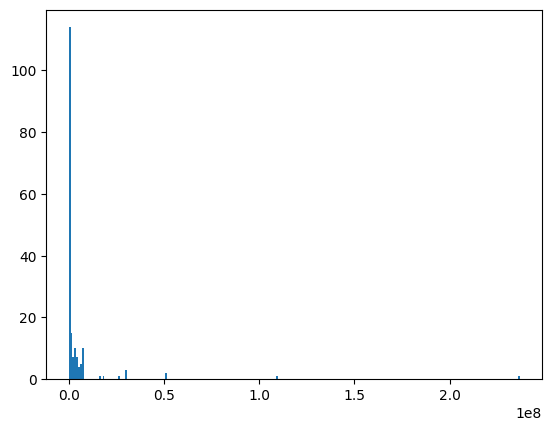

Овощи листовые или стебельные прочие [3324256.65, 3324256.65, 386130.0, 386130.0, 1544648.63, 477290.0, 477290.0, 477290.0, 119050.0, 364400.0, 364400.0, 364400.0, 869250.0, 869250.0, 152042.0, 152042.0, 526900.0, 991700.0, 229890.0, 229890.0, 975850.0, 975850.0, 975850.0, 975850.0, 975850.0, 18594150.0, 18594150.0, 6846013.13, 6846013.13, 6846013.13, 6846013.13, 6846013.13, 6846013.13, 6846013.13, 6846013.13, 6846013.13, 628050.0, 628050.0, 563620.0, 122284.0, 347100.0, 1267875.0, 150623.46, 150623.46, 5553598.93, 5553598.93, 5553598.93, 5553598.93, 5553598.93, 5553598.93, 84200.0, 84200.0, 84200.0, 4003090.75, 4003090.75, 4003090.75, 4003090.75, 4003090.75, 4003090.75, 4003090.75, 4003090.75, 231922.1, 231922.1, 440903.0, 440903.0, 312065.0, 1124182.68, 6409867.72, 1119787.97, 785731.16, 785731.16, 12298.0, 12298.0, 12298.0, 299100.0, 299100.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 345610.0, 569200.0, 1

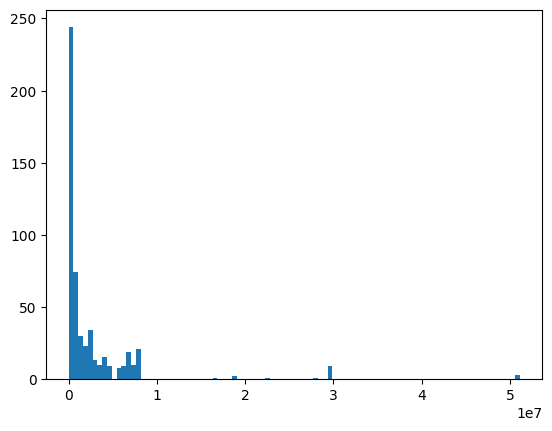

Капуста белокочанная [3324256.65, 386130.0, 768050.0, 212500.0, 1544648.63, 477290.0, 514562.2, 304080.0, 119050.0, 40660.0, 2212000.0, 535000.0, 364400.0, 869250.0, 36780.0, 1032150.0, 1387714.76, 152042.0, 40640.0, 526900.0, 991700.0, 2891350.0, 200000.0, 875800.0, 18594150.0, 628050.0, 114313.45, 899900.0, 339900.0, 563620.0, 553036.0, 80000.0, 2093066.78, 183805.0, 400913.0, 194470.0, 122284.0, 1245945.0, 1701500.0, 207672.0, 678364.78, 4628391.9, 4628391.9, 496600.0, 174075.0, 75195.0, 170800.0, 27165.0, 107730.0, 475200.0, 72768.0, 27155.0, 150975.0, 72365.0, 63975.0, 153850.0, 143365.0, 296859.16, 108150.0, 143830.0, 347100.0, 77675.0, 1493000.0, 321000.0, 346075.0, 79675.0, 272800.0, 77570.0, 154680.0, 113775.0, 951700.0, 143200.0, 61710.0, 64525.0, 157280.0, 3794.0, 123775.0, 185675.0, 249600.0, 195300.0, 305425.1, 181320.0, 270050.0, 270775.0, 1267875.0, 90350.0, 170250.0, 88800.0, 120150.0, 267550.0, 137400.0, 174720.0, 513090.0, 150623.46, 723400.0, 188820.0, 27999533.4, 97

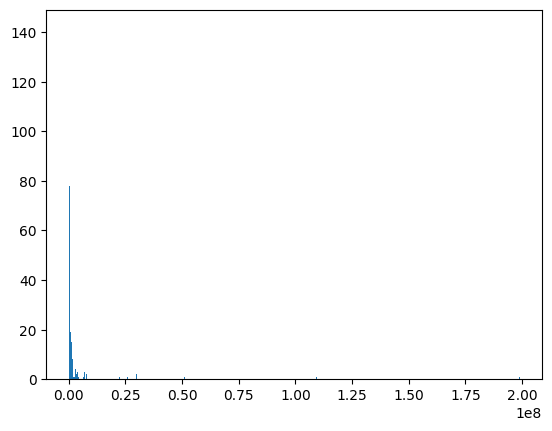

Картофель столовый поздний [3324256.65, 397000.0, 1544648.63, 514562.2, 514562.2, 304080.0, 119050.0, 40660.0, 112000.0, 535000.0, 364400.0, 869250.0, 40640.0, 526900.0, 2891350.0, 200000.0, 875800.0, 18594150.0, 114313.45, 42000.0, 563620.0, 553036.0, 80000.0, 2093066.78, 194470.0, 1245945.0, 4628391.9, 4628391.9, 496600.0, 475200.0, 72768.0, 296859.16, 216000.0, 272800.0, 154680.0, 951700.0, 61710.0, 305425.1, 513090.0, 150623.46, 723400.0, 27999533.4, 9788400.0, 409000.0, 409770.0, 4003090.75, 231922.1, 581870.5, 47585045.0, 47585045.0, 5970330.0, 1960000.0, 191875.0, 191875.0, 191875.0, 68383.0, 1507590.0, 2250342.0, 3096031.4, 6409867.72, 450000.0, 785731.16, 345610.0, 108910.0, 498015.0, 189200.0, 146820.0, 321796.0, 600000.0, 5967929.0, 5967929.0, 463400.0, 198686.0, 77920.0, 875200.0, 1500000.0, 115003.86, 224150.0, 1036782.72, 273112.0, 380030.0, 396690.4, 2545249.0, 179870.0, 800672.88, 20784.0, 75752.0, 344050.0, 85030.0, 120480.0, 475350.0, 112450.0, 51103350.97, 35386.08, 

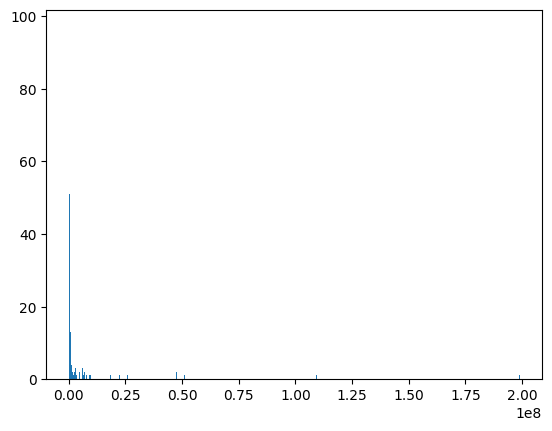

Лук репчатый [3324256.65, 386130.0, 768050.0, 397000.0, 1544648.63, 477290.0, 514562.2, 304080.0, 119050.0, 40660.0, 2212000.0, 535000.0, 364400.0, 869250.0, 36780.0, 1032150.0, 1387714.76, 152042.0, 40640.0, 526900.0, 526900.0, 991700.0, 2891350.0, 200000.0, 875800.0, 18594150.0, 6846013.13, 6846013.13, 628050.0, 114313.45, 30004004.45, 563620.0, 553036.0, 80000.0, 2093066.78, 183805.0, 400913.0, 122284.0, 776430.0, 1245945.0, 1245945.0, 678364.78, 4628391.9, 4628391.9, 496600.0, 174075.0, 75195.0, 170800.0, 27165.0, 107730.0, 475200.0, 72768.0, 27155.0, 150975.0, 72365.0, 63975.0, 153850.0, 143365.0, 296859.16, 108150.0, 143830.0, 347100.0, 77675.0, 1493000.0, 321000.0, 346075.0, 79675.0, 272800.0, 77570.0, 154680.0, 113775.0, 951700.0, 143200.0, 61710.0, 64525.0, 157280.0, 3794.0, 123775.0, 185675.0, 195300.0, 305425.1, 181320.0, 270050.0, 270775.0, 1267875.0, 90350.0, 170250.0, 88800.0, 120150.0, 267550.0, 137400.0, 174720.0, 513090.0, 150623.46, 723400.0, 188820.0, 27999533.4, 978

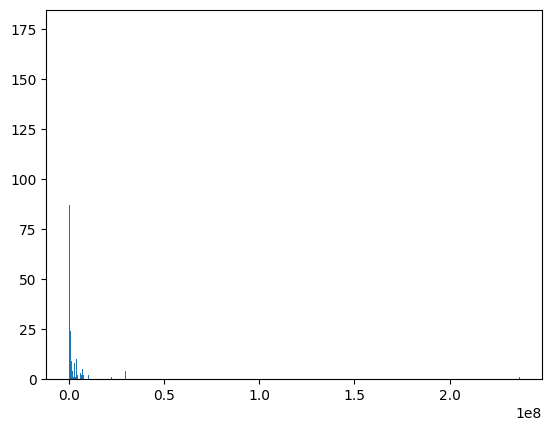

In [43]:
import numpy as np
import matplotlib.pyplot as plt
k = 0
for p in products:
    if len(products[p]) > 100:
      print(p, products[p])
      print(np.histogram(products[p]))
      _ = plt.hist(products[p], bins='auto')  # arguments are passed to np.histogram
      plt.show()

      k = k + 1
      if k == 10:
        break